
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [44]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used for visualization
import pingouin as pg # used for statistical analysis

# Load the data into a Dataframe
df_mh = pd.read_csv('MillerHadenData.csv')

In [45]:
# Q1a (code):
# Reading Ability (Abil) and Intelligence (IQ) are likely to be interval or ratio variables since they involve measurements on a continuous scale.
# Display first few rows of the dataframe

print(df_mh.head())

# Check data types and information
print(df_mh.info())

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [46]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()
print("Missing values:\n", missing_values)


# Check whether there is a data point for each participant on both variables
participants_count = df_mh['Participant'].nunique()
abil_count = df_mh['Abil'].nunique()
iq_count = df_mh['IQ'].nunique()

if participants_count == abil_count == iq_count:
    print("There is a data point for each participant on both variables.")
else:
    print("There is at least one participant without a data point on one or both variables.")


Missing values:
 Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
There is at least one participant without a data point on one or both variables.


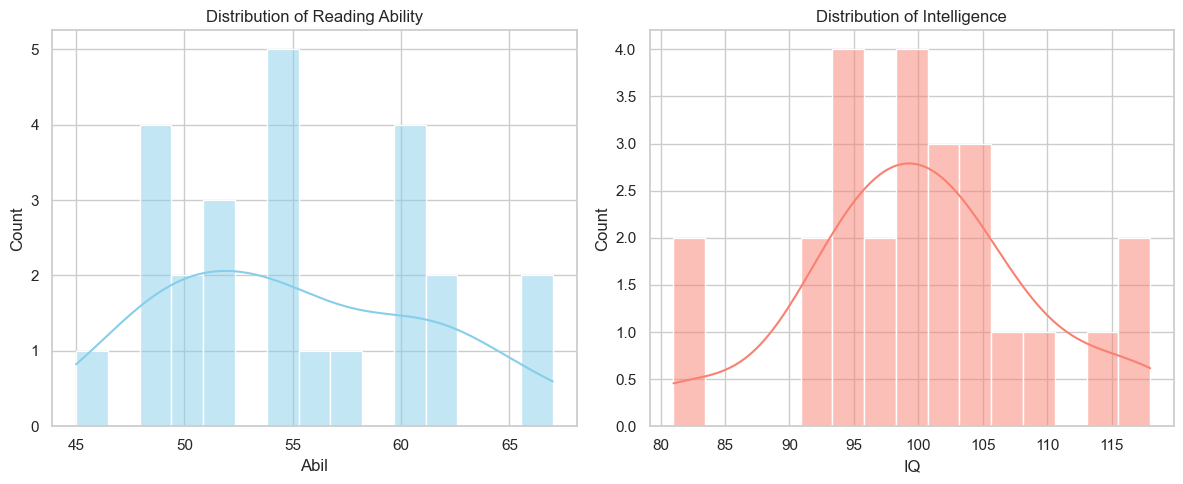

In [47]:
# Q1c (code):
# Check data distribution
sns.set(style="whitegrid")  # Set the style of the plots

# Create histograms for Reading Ability and Intelligence
# The kde=True parameter adds a kernel density estimate curve to the plot, and the bins parameter controls the number of bins for the histogram.
plt.figure(figsize=(12, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Create subplot for Reading Ability
sns.histplot(df_mh['Abil'], kde=True, color='skyblue', bins=15)
plt.title('Distribution of Reading Ability')

plt.subplot(1, 2, 2)  # Create subplot for Intelligence
sns.histplot(df_mh['IQ'], kde=True, color='salmon', bins=15)
plt.title('Distribution of Intelligence')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


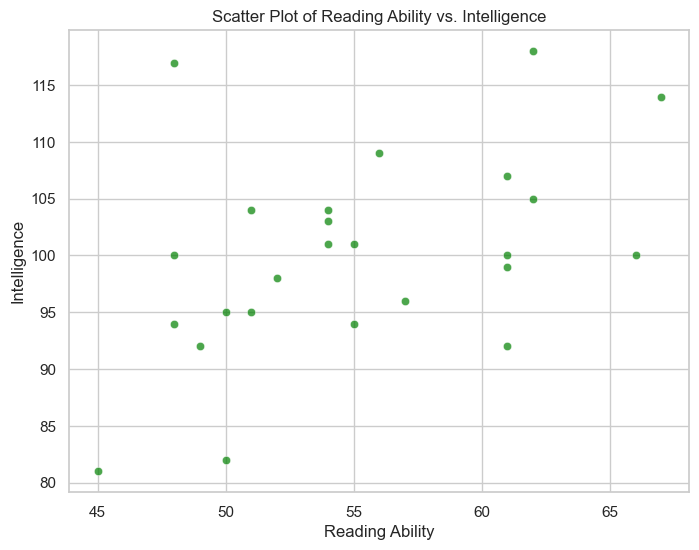

In [49]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
# The alpha parameter adjusts the transparency of the data points, and color sets the color of the points. 
sns.scatterplot(x='Abil', y='IQ', data=df_mh, color='green', alpha=0.7)
plt.title('Scatter Plot of Reading Ability vs. Intelligence')
plt.xlabel('Reading Ability')
plt.ylabel('Intelligence')
plt.grid(True)  # Add grid lines
plt.show()

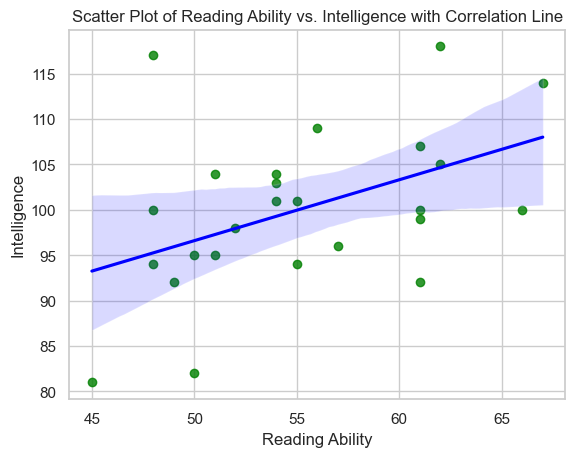

In [50]:
# Q1e (code):
# Correlation line
# The scatter_kws parameter sets the properties of the scatter points (in this case, the color is set to green)
# The line_kws parameter adjusts the properties of the regression line (here, the color is set to blue).
sns.regplot(x='Abil', y='IQ', data=df_mh, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
plt.title('Scatter Plot of Reading Ability vs. Intelligence with Correlation Line')
plt.xlabel('Reading Ability')
plt.ylabel('Intelligence')
plt.grid(True)  # Add grid lines
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):

Based on the results of Question 1, we observed that the distribution of the variables (Reading Ability and Intelligence) may not be perfectly linear. However, since both variables are continuous, Pearson correlation can still be used if the relationship between them is approximately linear and the assumptions of normality and homoscedasticity are met.

However, if the relationship is not linear or the assumptions of Pearson correlation are violated, Spearman correlation, which measures the strength and direction of association between two ranked variables, can be more appropriate. This is because Spearman correlation does not assume linearity or require normally distributed data.

In [51]:
# Q2b (code):
# Conduct a correlation coefficient test
# Using the pearsonr() function from the SciPy
# Computes the Pearson correlation coefficient along with a p-value for testing non-correlation.
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
# The Pearson correlation coefficient ranges from -1 to 1
# This method measures the linear relationship between two variables.
pearson_corr, pearson_p_value = pearsonr(df_mh['Abil'], df_mh['IQ'])

print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)


Pearson correlation coefficient: 0.45116993876507605
p-value: 0.02359260883361456


# Q2c (answer with words):

1.Direction: The sign of the Pearson correlation coefficient indicates the direction of the association between Reading Ability (Abil) and Intelligence (IQ). If the coefficient is positive, it indicates a positive association, meaning that as one variable increases, the other tends to increase as well. If the coefficient is negative, it indicates a negative association, suggesting that as one variable increases, the other tends to decrease.

2.Strength: The magnitude of the Pearson correlation coefficient indicates the strength of the association. Values closer to 1 or -1 indicate a stronger linear relationship between the variables, while values closer to 0 suggest a weaker linear relationship. The closer the coefficient is to 1 or -1, the stronger the association.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words)

 H0:Null Hypothesis :There is no significant association between Reading Ability (Rank_Abil) and the amount of time spent reading at home per week (Rank_Home).
 
 H1:There is a significant association between Reading Ability (Rank_Abil) and the amount of time spent reading at home per week (Rank_Home).

In [52]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # used for data manipulation
from scipy.stats import chi2_contingency  # used for chi-square test

# Define the rounded average for Reading Ability and Home
abil_avg = round(df_mh['Abil'].mean())
home_avg = round(df_mh['Home'].mean())

# Define function to categorize reading ability
def categorize_abil(abil):
    if abil <= abil_avg:
        return 'Low'
    else:
        return 'High'

# Define function to categorize home reading time
def categorize_home(home):
    if home <= home_avg:
        return 'Infrequent'
    else:
        return 'Frequent'

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(categorize_abil)

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(categorize_home)


In [53]:
# Q3c (code):
# Construct Contingency Matrix
contingency_table = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [54]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-square Statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies Table:
[[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):

1.The Chi-square statistic tests the independence between two categorical variables. In this case, it tests whether there is a significant association between Reading Ability (Rank_Abil) and the amount of time spent reading at home per week (Rank_Home).

2.The p-value associated with the Chi-square statistic is compared to a significance level (e.g., α = 0.05) to determine statistical significance. If the p-value is less than the significance level, we reject the null hypothesis (H0), indicating a significant association. Otherwise, if the p-value is greater than the significance level, we fail to reject the null hypothesis (H0), suggesting no significant association.

3.The expected frequencies table shows the expected counts under the assumption of independence between the variables. Comparing the observed counts (Contingency Table) with the expected counts can provide insights into any deviations from independence.

4.The degrees of freedom (dof) is a parameter that helps interpret the Chi-square statistic and is used in determining the critical value for the test.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [55]:
# Load the necessary libraries and explain why you need them
import pandas as pd  # used for data manipulation and analysis
from scipy import stats  # used for statistical analysis
import numpy as np  # used for numerical computing
import matplotlib.pyplot as plt  # used for data visualization
import seaborn as sns  # used for enhanced data visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [56]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

# Handle missing values
# Fill missing values with the mean age
df_evaluators['age'].fillna(mean_age, inplace=True)

# Recalculate mean and standard deviation after handling missing values
mean_age_after_fill = df_evaluators['age'].mean()
std_age_after_fill = df_evaluators['age'].std()

# Display the results
print("Mean age of Evaluators (Before handling missing values):", mean_age)
print("Standard Deviation of age of Evaluators (Before handling missing values):", std_age)
print("Mean age of Evaluators (After handling missing values):", mean_age_after_fill)
print("Standard Deviation of age of Evaluators (After handling missing values):", std_age_after_fill)

Mean age of Evaluators (Before handling missing values): 30.852941176470587
Standard Deviation of age of Evaluators (Before handling missing values): 6.238358141327351
Mean age of Evaluators (After handling missing values): 30.852941176470587
Standard Deviation of age of Evaluators (After handling missing values): 5.813470532176367


In [57]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators['sex'] == 1).sum()
female_count = (df_evaluators['sex'] == 2).sum()

# Display the results
print("Number of Male Evaluators:", male_count)
print("Number of Female Evaluators:", female_count)

Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [58]:
# Load the necessary libraries 
import pandas as pd  # used for data manipulation
import numpy as np  # used for numerical operations
from scipy import stats  # used for statistical calculations

# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [59]:
# Q5 (code)
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ['thoughtful', 'competent', 'intelligent']
filtered_df = df_ratings[df_ratings['Category'].isin(categories)]

# Calculate the mean intellect rating for each evaluator
intellect_mean = filtered_df.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'  # Consistent naming convention

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])  # Concatenation for combining ratings

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(by=['eval_id', 'Category'], inplace=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
Null Hypothesis (H0): There is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (μ1 = μ2).
Alternative Hypothesis (H1): There will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (μ1 ≠ μ2).tches and evaluators who read pitches.

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

We should choose a two-tailed t-test. 

This is because we want to determine whether there is a significant difference between the two groups in terms of overall ratings, but we do not have a specific directional hypothesis (i.e., we are not testing whether one group's ratings are necessarily higher or lower than the other). Therefore, a two-tailed test is appropriate as it considers differences in both directions.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

The independent variable here is the method of presentation of resume pitches, which has two levels: listening and reading.

The dependent variable is the overall rating given by evaluators, which is continuous and measured on a scale.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [60]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby(['Category', 'condition'])['Rating'].apply(lambda x: shapiro(x)[1])

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[ratings2['condition'] == 'listened']['Rating'],
                        ratings2[ratings2['condition'] == 'read']['Rating'])

# Independent t-tests
ttest_results = ratings2.groupby('Category').apply(lambda x: ttest_ind(
    x[x['condition'] == 'listened']['Rating'],
    x[x['condition'] == 'read']['Rating']
)[1])

# Print the test results
print(ratings_desc)
print(shapiro_results)
print(levene_results)
print(ttest_results)


                      count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.666667  7.000000  
Categor

## Q7b (answer in words):

1.Descriptive Statistics: The descriptive statistics provide information about the mean, standard deviation, and other summary measures of the ratings for each category and condition.

2.Shapiro-Wilk Test: This test assesses whether the ratings data follow a normal distribution. A p-value greater than 0.05 indicates that the data are normally distributed. We use this test to ensure that the assumption of normality is met for conducting parametric tests like the t-test.

3.Levene's Test: This test evaluates the homogeneity of variances between the listened and read conditions for each category. A non-significant result (p > 0.05) suggests that the variances are homogeneous across groups. We use this test to ensure that the variances are approximately equal between groups, which is an assumption of the t-test.

4.Independent t-tests: These tests determine whether there is a significant difference in ratings between the listened and read conditions for each category. A p-value less than 0.05 indicates a significant difference between conditions. We use these tests to examine whether the method of presentation (listening vs. reading) significantly affects the ratings given by evaluators for intellect, impression, and hire traits.